In [1]:
%matplotlib inline


# Instance Hardness Threshold


An illustration of the instance hardness threshold method.




Automatically created module for IPython interactive environment


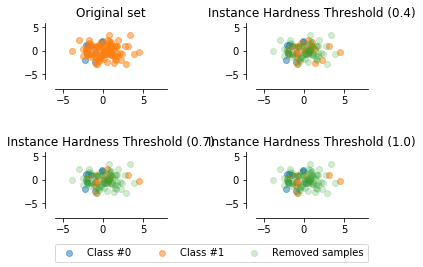

In [2]:
# Authors: Dayvid Oliveira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import InstanceHardnessThreshold

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=1., weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=100, random_state=10)

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

# Two subplots, unpack the axes array immediately
f, axs = plt.subplots(2, 2)

axs = [a for ax in axs for a in ax]
for ax, ratio in zip(axs, [0.0, 0.4, 0.7, 1.0]):
    if ratio == 0.0:
        c0, c1 = plot_resampling(ax, X_vis, y, 'Original set')
    else:
        iht = InstanceHardnessThreshold(ratio=ratio,
                                        estimator=LogisticRegression(),
                                        return_indices=True)
        X_res, y_res, idx_res = iht.fit_sample(X, y)
        X_res_vis = pca.transform(X_res)
        plot_resampling(ax, X_res_vis, y_res,
                        'Instance Hardness Threshold ({})'.format(ratio))
        # plot samples which have been removed
        idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                           idx_res)
        c3 = ax.scatter(X_vis[idx_samples_removed, 0],
                        X_vis[idx_samples_removed, 1],
                        alpha=.2, label='Removed samples')

plt.figlegend((c0, c1, c3), ('Class #0', 'Class #1', 'Removed samples'),
              loc='lower center', ncol=3, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()